In [7]:
'''
Sensor to plot and location of database
'''
db_path   = '/home/hass/.homeassistant/home-assistant_v2.db'
entities  = ['sensor.living_room_temperature', 'sensor.bedroom_temperature']
data_type = 'Temperature'
#entities = ['sensor.kevin_morning_commute']
#data_type = 'Commute'
#entities = ['sensor.living_room_humidity', 'sensor.pws_relative_humidity']
#data_type = 'Humidity'

In [8]:
%pylab inline
import sqlite3
import datetime
from matplotlib import dates
font = {'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=2)
matplotlib.rc({'axes.titlesize' : 'medium'})
conn = sqlite3.connect(db_path)

Populating the interactive namespace from numpy and matplotlib


In [9]:
values     = {}
timestamps = {}
dt_list    = {}
for entity in entities:
    data   = conn.execute("SELECT state, last_changed FROM states WHERE entity_id = '"+entity+"' AND state != 'unknown'")
    values[entity]     = []
    timestamps[entity] = []
    dt_list[entity]    = []
    for x in data:
        dt_list[entity].append(datetime.datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f'))
        timestamps[entity].append(dates.date2num(datetime.datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f')))
        values[entity].append(float(x[0]))
    

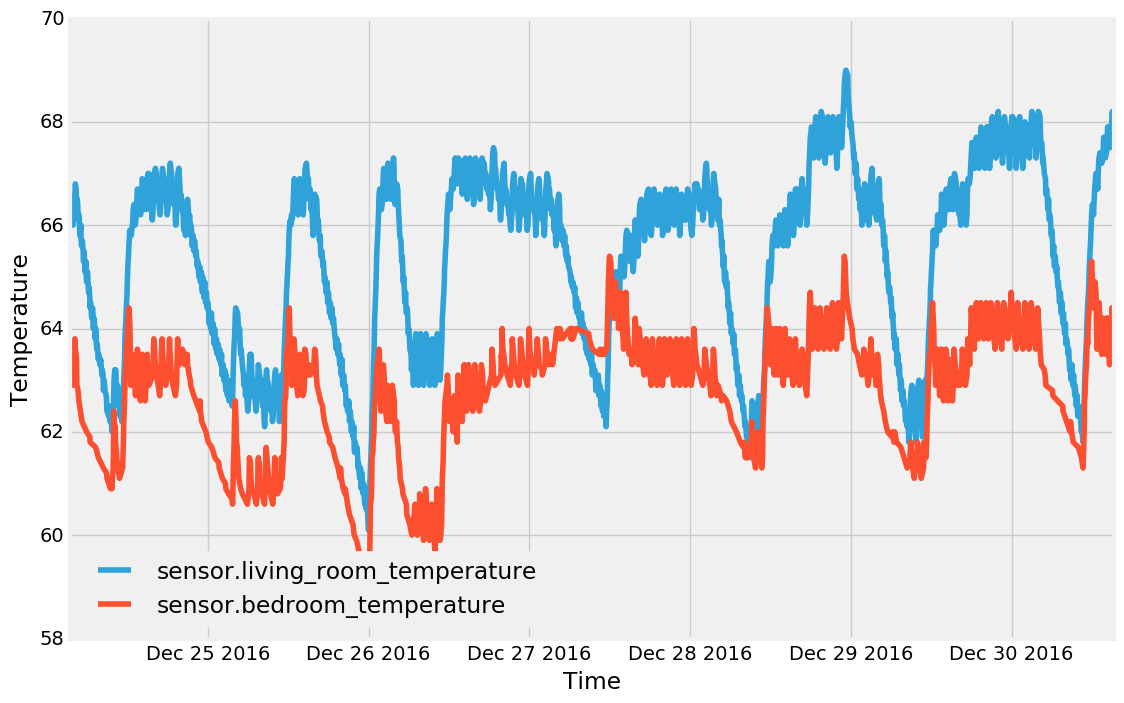

In [10]:
figure(num=None, figsize=(12,8), dpi=200) 
plt.hold(True)
plt.grid(b = 'on')
plt.style.use('fivethirtyeight')
for entity in entities:
    plt.plot_date(x=timestamps[entity], y=values[entity], fmt="-", label=entity)
    
plt.legend(loc='lower left')
plt.ylabel(data_type)
plt.xlabel('Time')

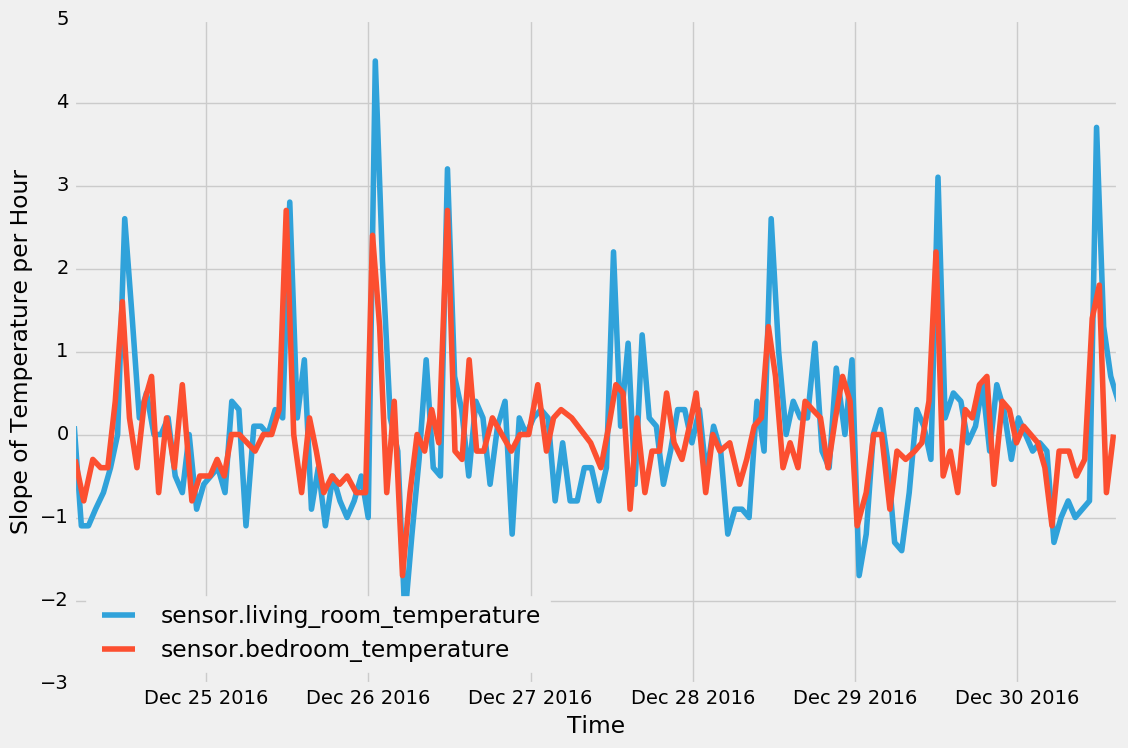

In [11]:
'''
Plot derivative of data in hourly increments
'''
dx = {}
dy = {}

figure(num=None, figsize=(12,8), dpi=200)  
for entity in entities:
    index_start = 0
    dx[entity] = []
    dy[entity] = []
    for index in range(1,len(values[entity])):
        time_delta = dt_list[entity][index]-dt_list[entity][index_start]
        if time_delta.seconds/3600 >= 1:
            dx[entity].append(timestamps[entity][index])
            dy[entity].append(values[entity][index]-values[entity][index_start])
            index_start = index

         
    plt.plot_date(x=dx[entity], y=dy[entity], fmt="-", label=entity)
    
plt.grid(b = 'on')
plt.style.use('fivethirtyeight')
plt.legend(loc='lower left')
plt.ylabel('Slope of '+data_type+' per Hour')
plt.xlabel('Time')